In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

in_data = 'FeatureMatrix.csv'
df_org = pd.read_csv(in_data, index_col=0)
print df_org.head(2)
#df = df_org.drop(['id'], axis = 1)
df = df_org.copy()
print df.shape
df_outlier = df[abs(df.rating1 - df.rating2)>=3].index
df.drop(df_outlier, inplace=True)
print df.shape
#print df.head(5)
df['err_by_word'] = df['total_errors']/df['wcount']
df['word_per_sent'] = df['wcount']/df['scount']

print '---------rating1 vs rating2------------'
coefc = np.corrcoef(df['rating1'], df['rating2'])
print coefc

print '---------total error vs rating------------'
coefc0 = np.corrcoef(df['total_errors'], df['rating'])
print coefc0


print '---------word count vs rating------------'
coefc1 = np.corrcoef(df['wcount'], df['rating'])
print coefc1

print '---------err_by_word vs rating------------'
coefc2 = np.corrcoef(df['err_by_word'], df['rating'])
print coefc2

print '---------word_per_sent vs rating------------'
coefc3 = np.corrcoef(df['word_per_sent'], df['rating'])
print coefc3

#Let us find the correlations
#drop rating1 & rating2
df.drop(['rating1', 'rating2'], axis = 1, inplace=True)
#print df.head(3)
df.to_csv('UpdatedFeatures.csv')
corrdf = df.corr(method='pearson')
print(corrdf.shape)
#print(corrdf.head(5)) 
rating_corr = corrdf['rating']
#print(min(rating_corr))
rating_corr_sorted = rating_corr.sort_values()
print(rating_corr_sorted.head())#Correlation coefficient of the target variable with predictors
print(rating_corr_sorted.tail())

class_corr = corrdf['class']
class_corr_sorted = class_corr.sort_values()
print(class_corr_sorted.head())#Correlation coefficient of the target variable with predictors
print(class_corr_sorted.tail())

           rating1  rating2  MORFOLOGIK_RULE_EN_GB  SENTENCE_FRAGMENT  \
stdid                                                                   
PH2014003        3        3                    0.0                0.0   
PH2015015        4        4                    0.0                0.0   

           ENGLISH_WORD_REPEAT_BEGINNING_RULE  IN_PAST  I_LOWERCASE  \
stdid                                                                 
PH2014003                                 0.0      0.0          0.0   
PH2015015                                 0.0      0.0          0.0   

           HE_VERB_AGR  THERE_S_MANY  COMMA_PARENTHESIS_WHITESPACE  \
stdid                                                                
PH2014003          0.0           0.0                           0.0   
PH2015015          0.0           0.0                           1.0   

               ...       NON_ACTION_CONTINUOUS  A_PLURAL  LITTLE_BIT  CD_NN  \
stdid          ...                                            

In [3]:
#df1 = df.drop(['stdid'], axis=1)
##Find out correlations after divide by word count
target = df['rating']
#exclude rating column as we don't want to devide rating by no of words
df1 = df.drop(['rating'], axis=1)
#divide by total no of words for each response, error/word
#normalization?
#print (df['count'])
target_cls = df['class']
df1 = df1.drop(['class', 'err_by_word', 'word_per_sent'], axis=1)
df1 = df1.select_dtypes(exclude=['object']).divide(df['wcount'], axis='index')
df1.drop(['wcount'], axis=1, inplace=True)
#print df1.head(5)
#normalize
df_norm = (df1 - df1.mean()) / (df1.max() - df1.min())
df_merged = df_norm.copy()
print df_norm.mean().tail()
#merged the target column back to new table so as to calculate correlation
df_merged['rating'] = target 
corrdf2 = df_merged.corr(method='pearson')
rating_corr2 = corrdf2['rating']
rating_corr_sorted2 = rating_corr2.sort_values()
print(rating_corr_sorted2.head())
print(rating_corr_sorted2.tail())
print rating_corr2.loc['total_errors']

LITTLE_BIT          -1.000017e-17
CD_NN                8.231433e-18
APOSTROPHE_PLURAL    4.966071e-18
scount               1.164646e-16
total_errors         3.564687e-17
dtype: float64
MORFOLOGIK_RULE_EN_GB          -0.488473
scount                         -0.480468
total_errors                   -0.327939
COMMA_PARENTHESIS_WHITESPACE   -0.306871
UPPERCASE_SENTENCE_START       -0.274451
Name: rating, dtype: float64
PROGRESSIVE_VERBS           0.181153
EN_QUOTES                   0.187219
TRY_AND                     0.197438
ENGLISH_WORD_REPEAT_RULE    0.218179
rating                      1.000000
Name: rating, dtype: float64
-0.32793922361


In [4]:
#table without rating column
#df -> original column with stdid, rating, class, count, total_errors, err_by_word
#df1 -> contains errors/word, includes stdid, count, total_errors (/word now)
#df_norm -> normalized, columns same as df1
#df_merged --> df_norm + rating
shp = df1.shape
print(shp)
dim1 = shp[1]
print(dim1)
print(df_merged.shape)
df2 = df.copy()
#df2.drop(['stdid', 'rating', 'count'], axis=1, inplace=True)
print(df2.shape)
dim = df2.shape[1]
print len(df2)
print dim

#Let us find the correlations for each of the error attributes
np_df2= df2.select_dtypes(exclude=['object']).values
print np_df2.shape
np_target = target.values
together = []
for i in range(len(df2)):
    lst = np_df2[i].tolist()
    lst.append(np_target[i])
    together.append(lst)
#print(together[0:5])
corr = np.corrcoef(together,rowvar=0)
print corr.shape
print(corr[-1:,0:77]) #Correlation coefficient of the target variable with predictors

(102, 76)
76
(102, 77)
(102, 81)
102
81
(102L, 81L)
(82L, 82L)
[[-0.11055808 -0.0186529   0.28177478  0.13694997 -0.02038178 -0.03799037
  -0.02672993 -0.13376735 -0.02153919  0.07414038  0.04273926 -0.08869477
  -0.08289789 -0.15065961 -0.08289789 -0.10786761  0.02136885 -0.03284729
  -0.26357278 -0.1165361   0.02550704 -0.08202466  0.03523491 -0.02672993
  -0.02744595  0.00604392  0.03113415 -0.01062793  0.22178132  0.09411251
   0.15916459  0.1788187   0.08391729  0.05007822 -0.02672993  0.16522709
   0.00604392  0.02550704 -0.08202466  0.00863418  0.07607427 -0.02672993
   0.03523491  0.15916459 -0.04676291  0.05007822  0.14872138  0.09719975
   0.15916459  0.15916459 -0.08869477 -0.08869477  0.00604392  0.03523491
   0.20618194 -0.02672993  0.02367527 -0.15065961 -0.15065961  0.00604392
   0.00604392  0.03523491 -0.02672993  0.00604392  0.097777    0.15916459
   0.15916459  0.09411251  0.08352744  0.1381468   0.00604392  0.09411251
   0.03523491  0.09719975  0.59807853  0.59195844

In [5]:
df_plt = df
#.set_index('stdid')
print df_plt.shape[1]

81


Populating the interactive namespace from numpy and matplotlib


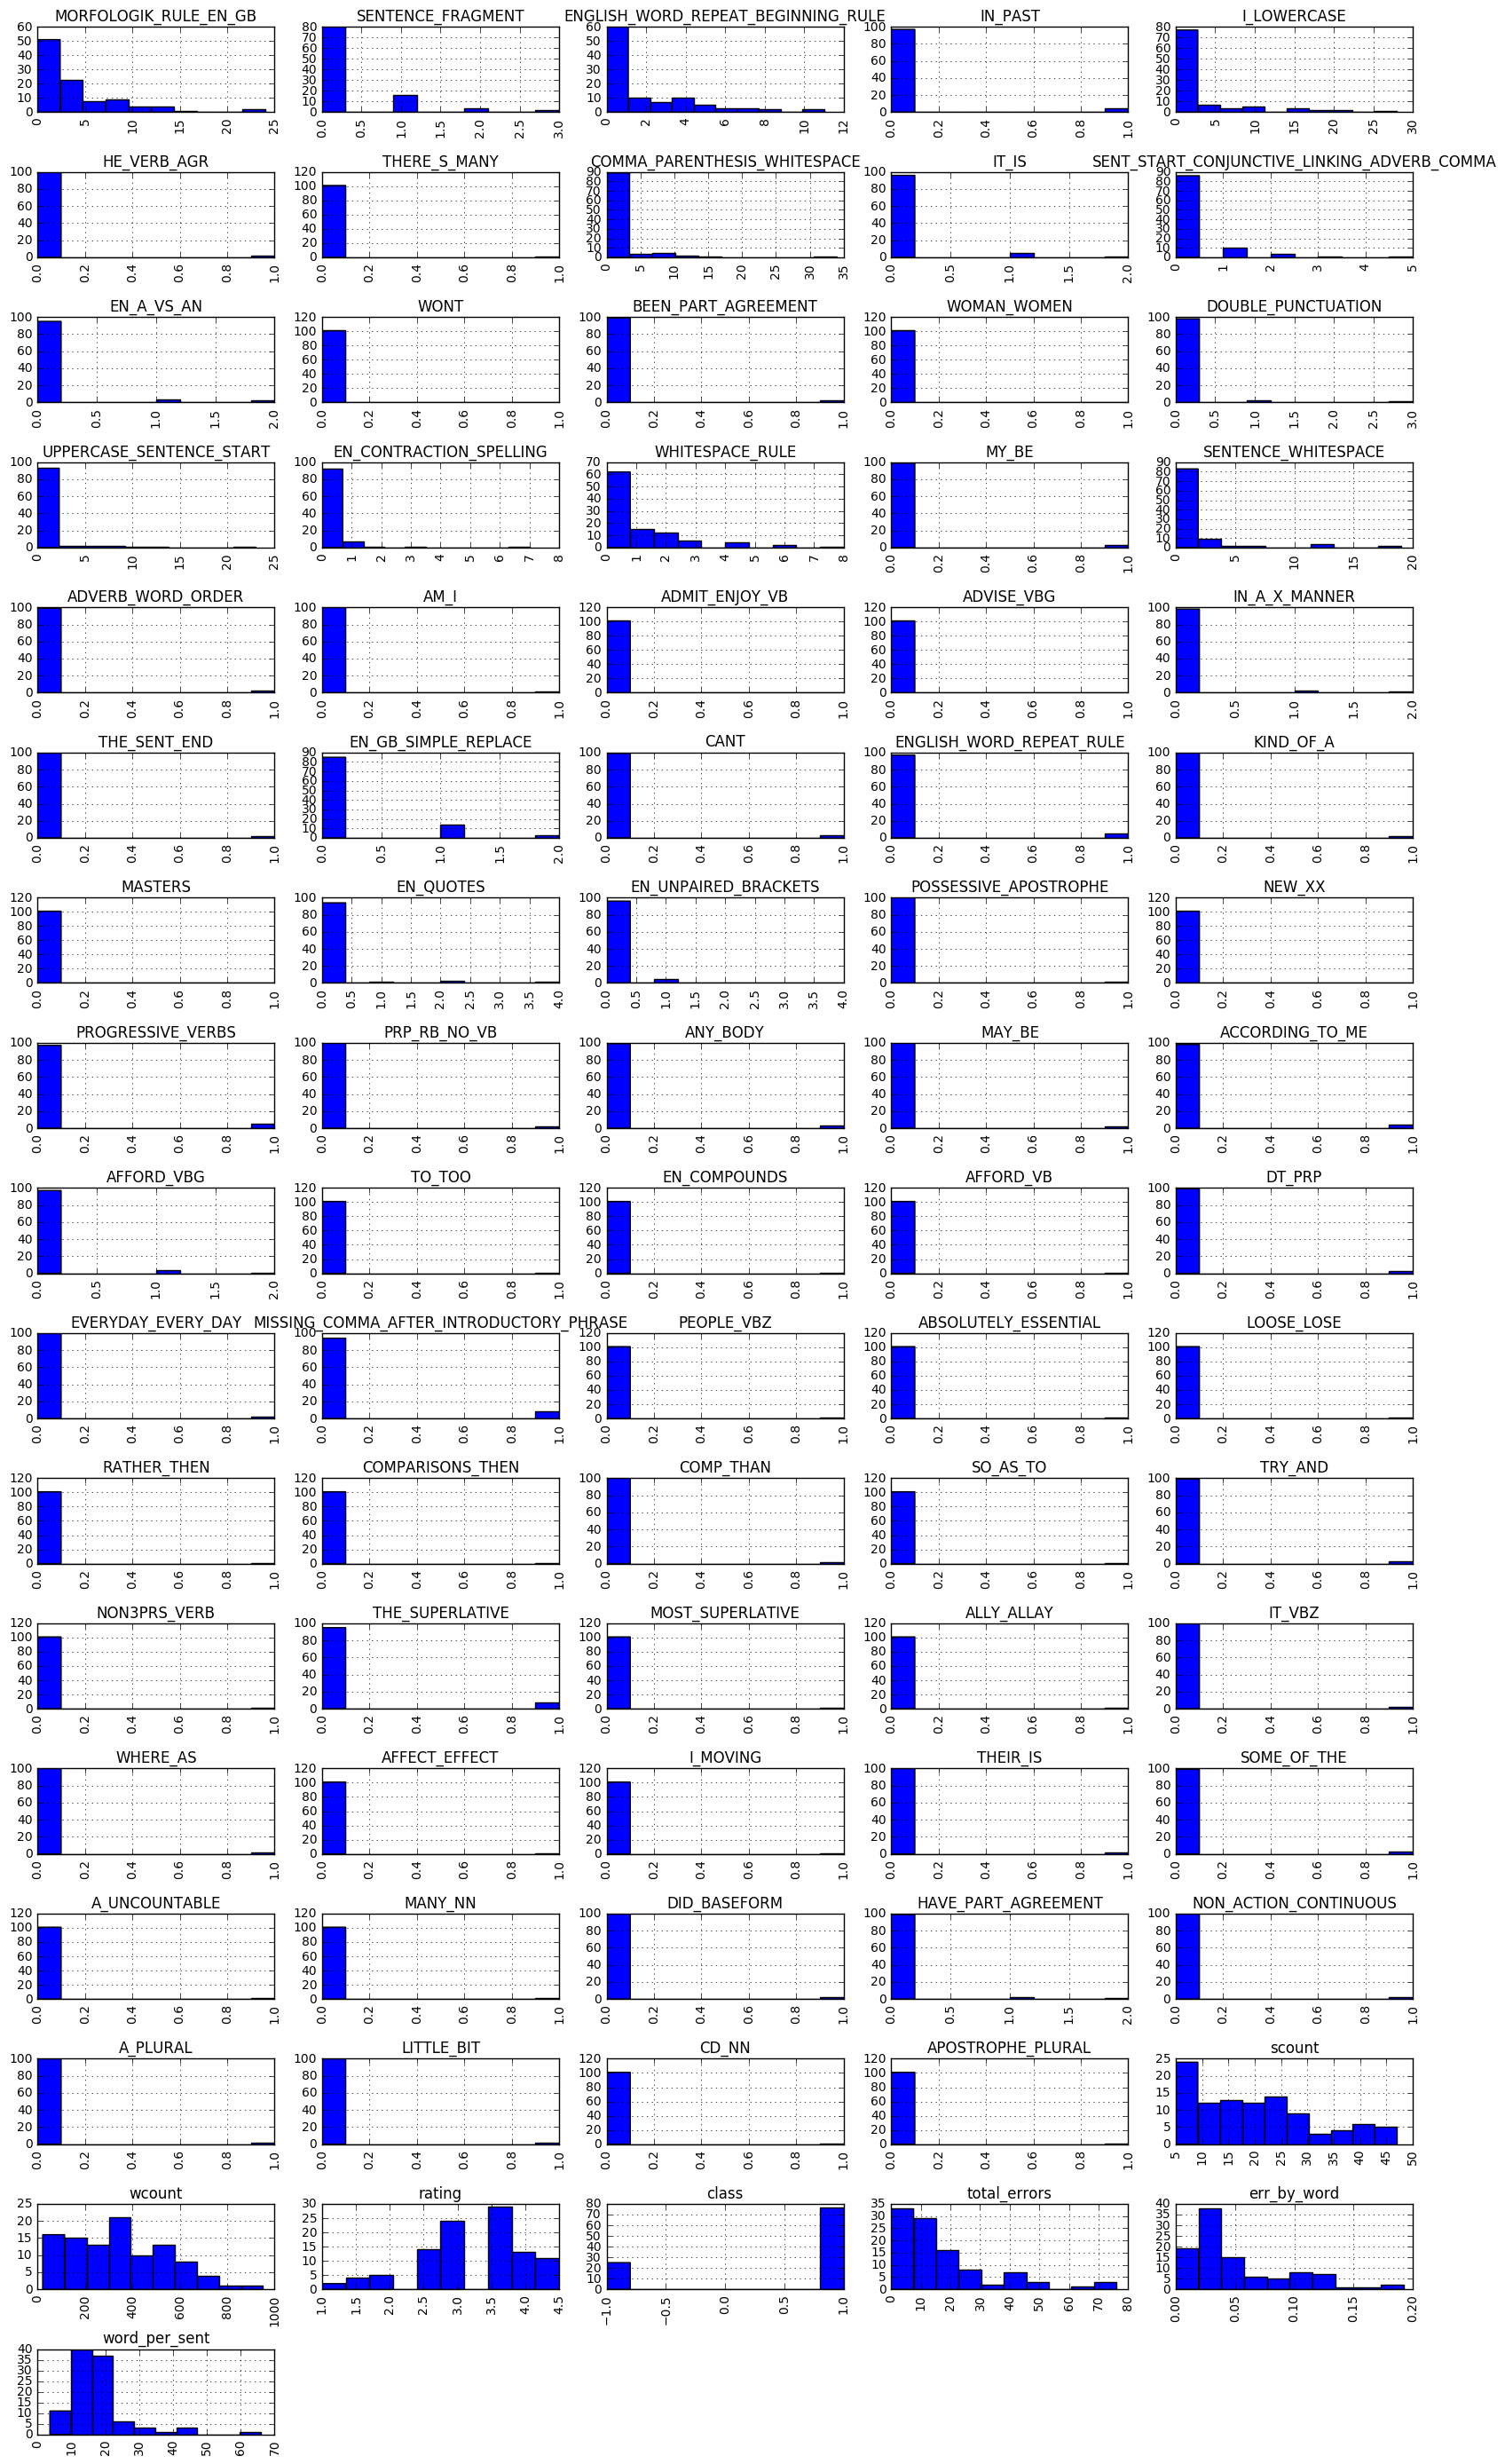

In [6]:
%pylab inline

fig = plt.figure(figsize=(20,35))
cols = 5
rows = math.ceil(float(df_plt.shape[1]) / cols)
for i, column in enumerate(df_plt.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df_plt.dtypes[column] == np.object:
        df_plt[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df_plt[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

Populating the interactive namespace from numpy and matplotlib


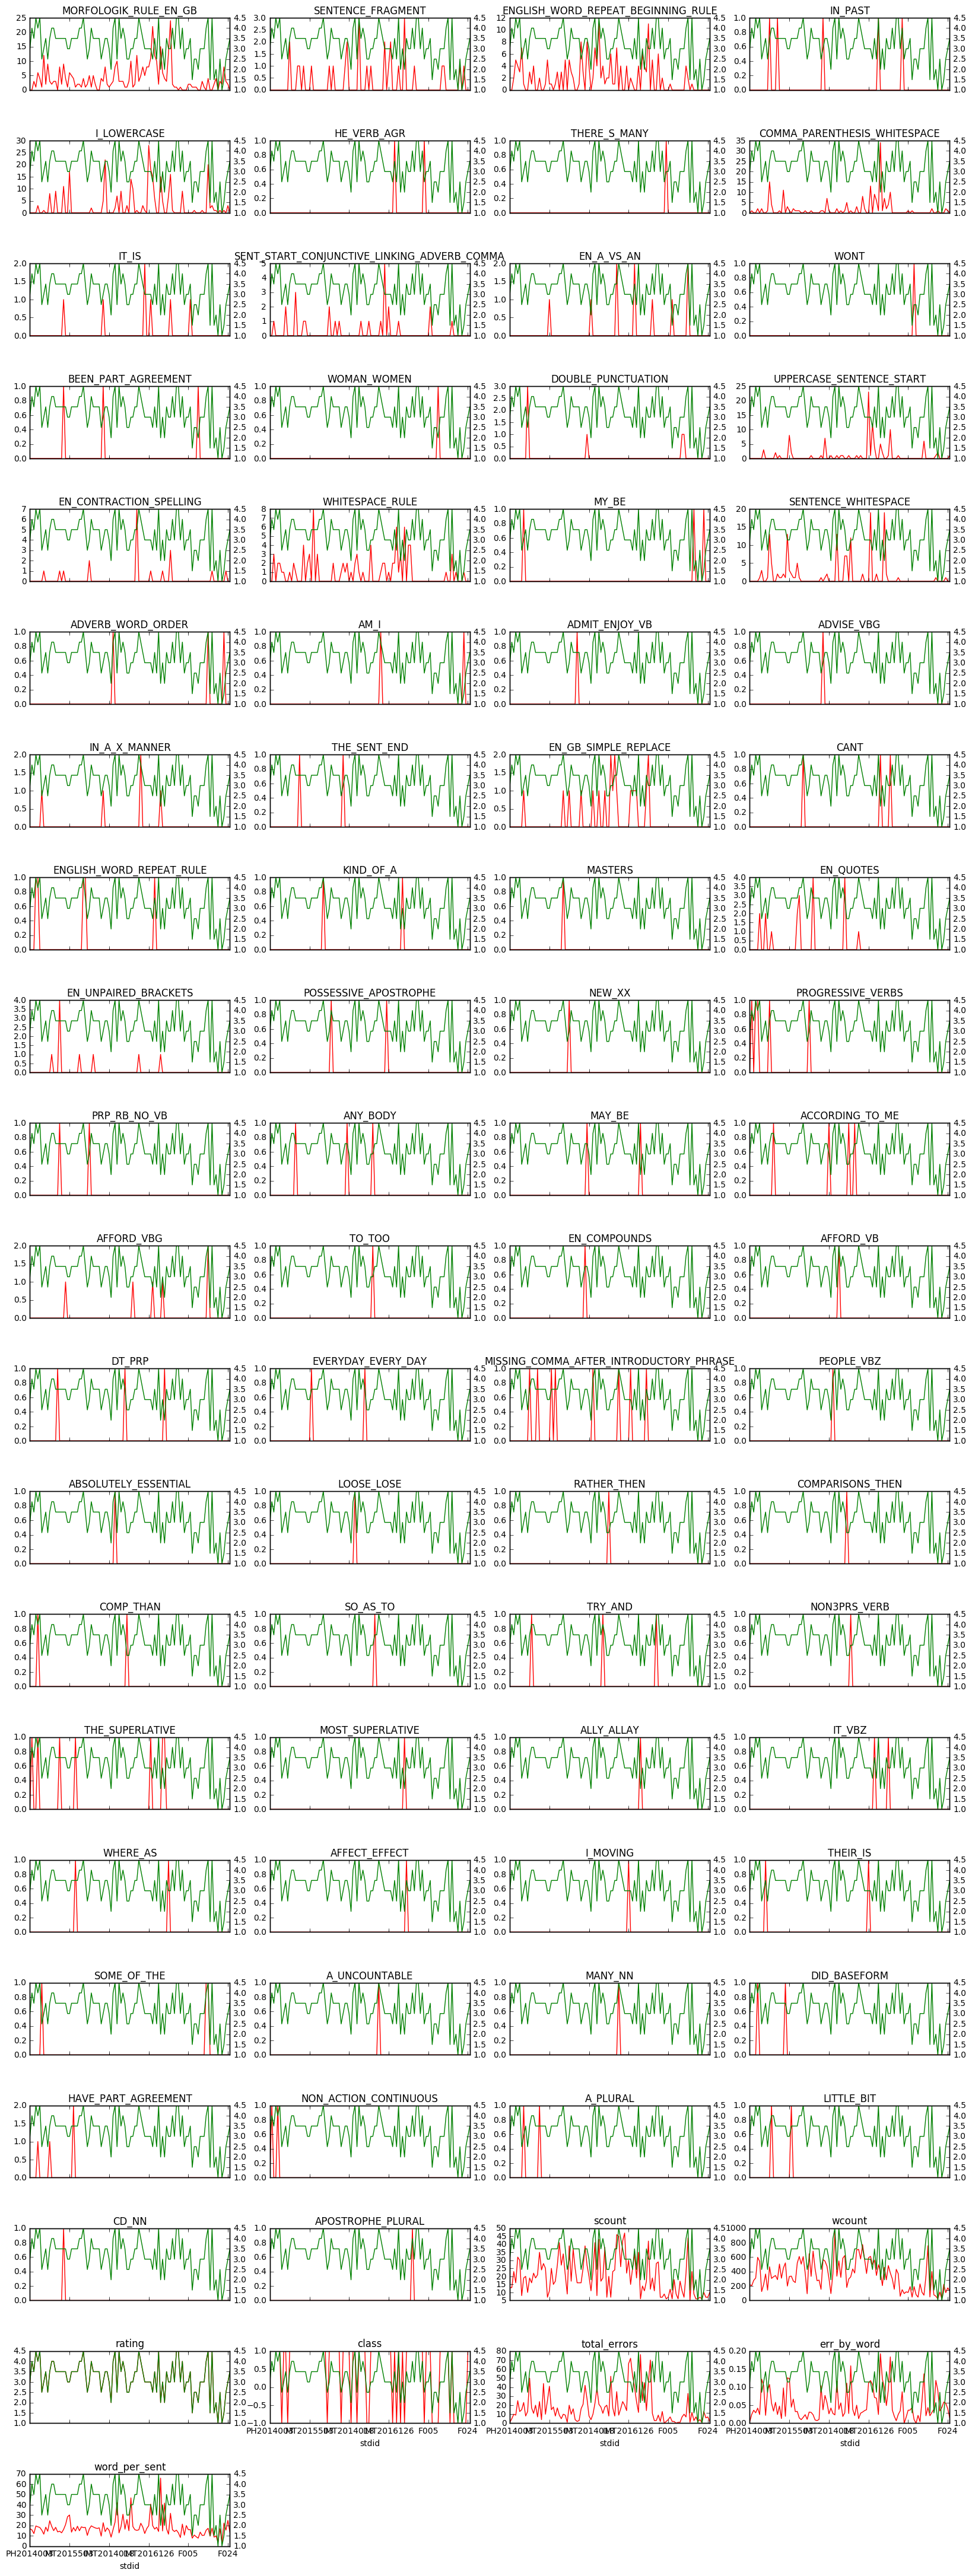

In [7]:
%pylab inline
#--plot of error counts vs rating
#df_plt = df
fig = plt.figure(figsize=(20,55))
cols = 4
rows = math.ceil(float(df_plt.shape[1]) / cols)
for i, column in enumerate(df_plt.columns):
    if df_plt.dtypes[column] != np.object:
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        df_plt[column].plot(style='r-')
        df_plt['rating'].plot(secondary_y=True, style='g-')
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

Populating the interactive namespace from numpy and matplotlib


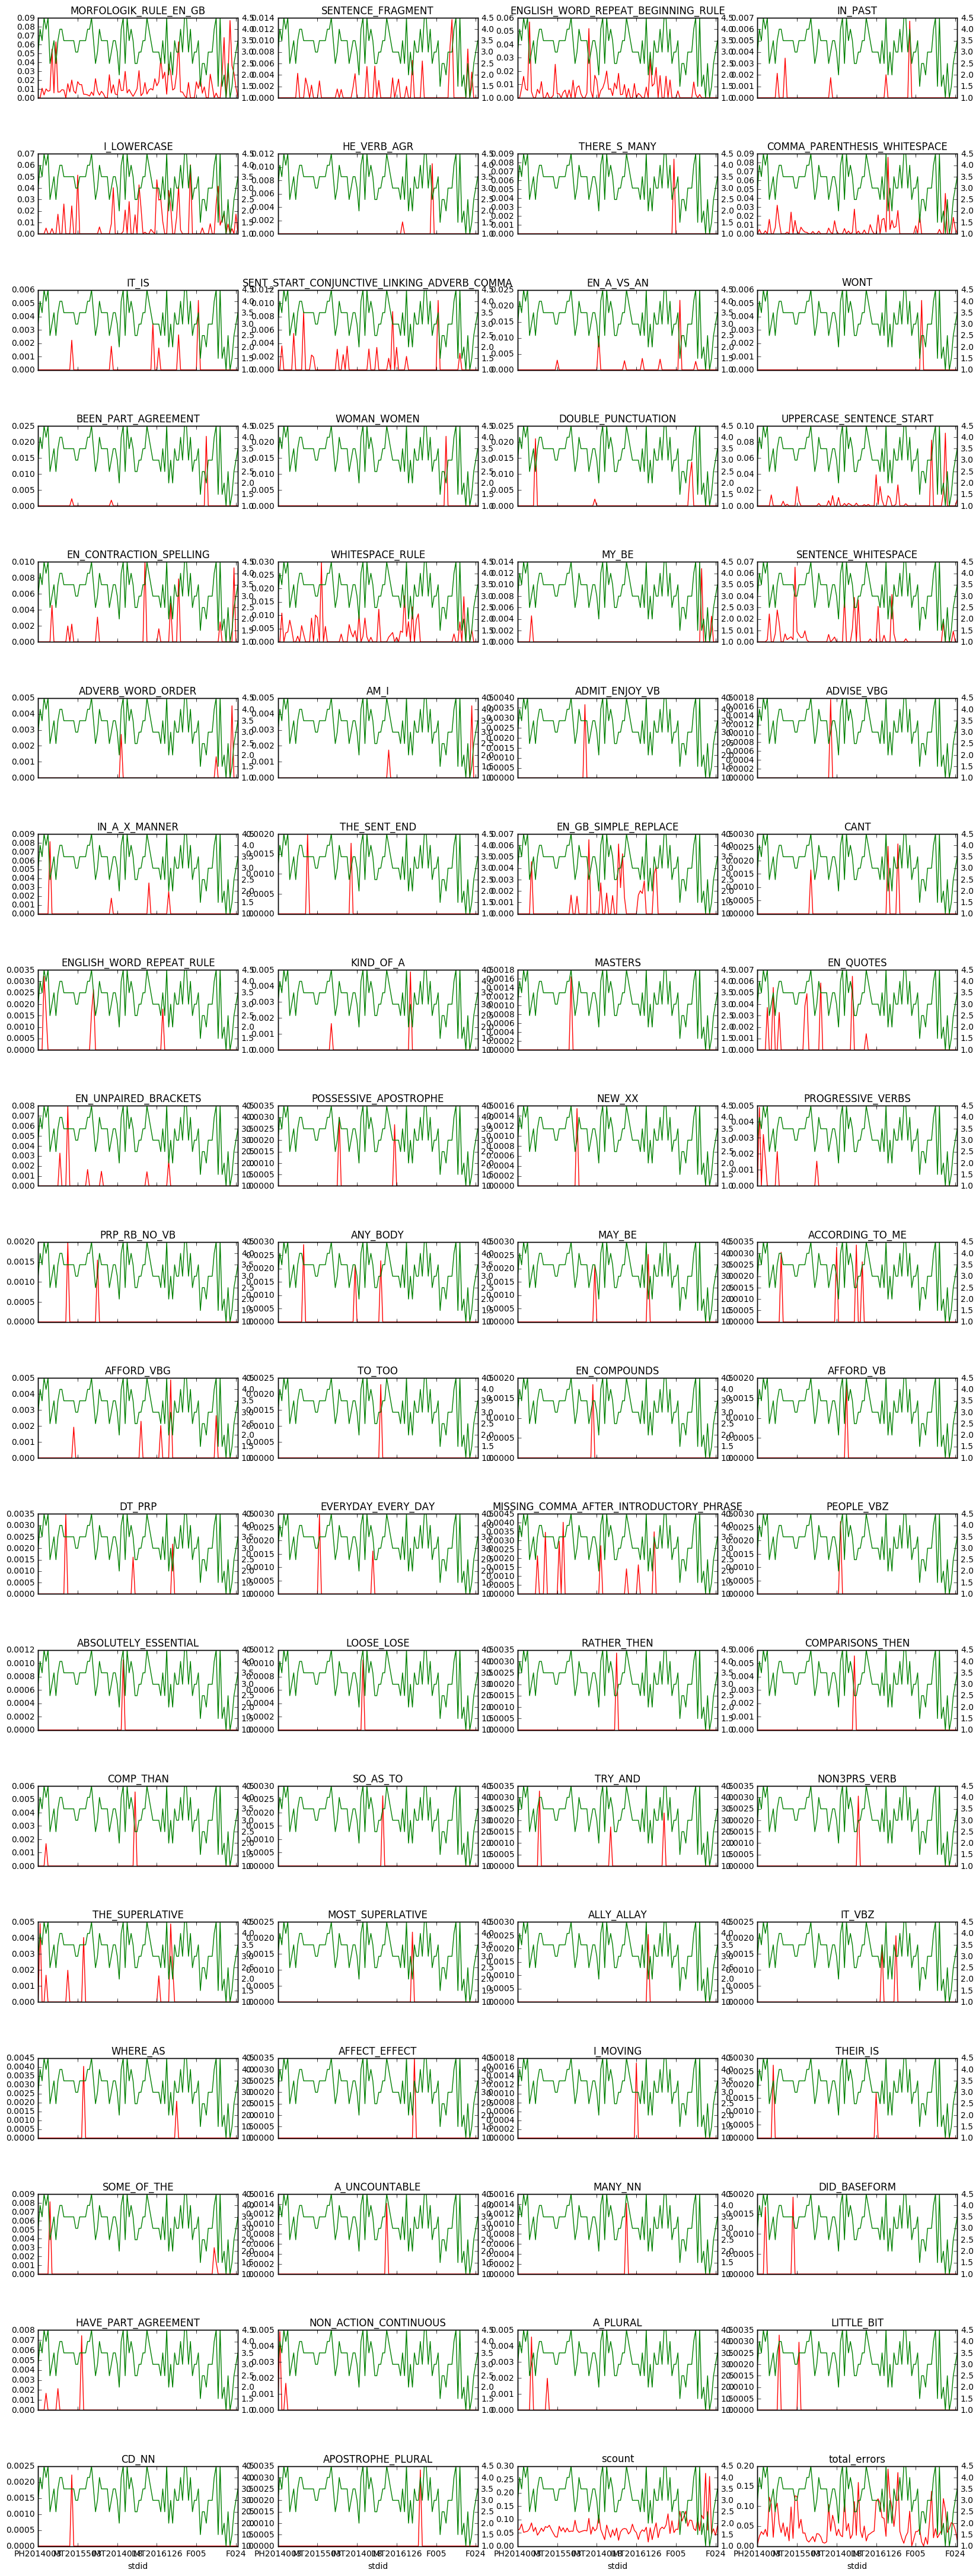

In [8]:
%pylab inline
#--plot of error counts/wc vs rating
#df1
fig1 = plt.figure(figsize=(20,55))
cols = 4
rows = math.ceil(float(df1.shape[1]) / cols)
for i, column in enumerate(df1.columns):
    if df1.dtypes[column] != np.object:
        ax = fig1.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        df1[column].plot(style='r-')
        target.plot(secondary_y=True, style='g-')
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [9]:
#Let us find the correlations for each of the error attributes
np_df1= df1.values
print len(df1.iloc[0])
dim2 = df1.shape[1]
print dim2
print len(df1)
print np_df1.shape
np_target = target.values
together2 = []
for i in range(len(df1)):
    lst = np_df1[i].tolist()
    lst.append(np_target[i])
    together2.append(lst)
#print(together[0:5])
corr2 = np.corrcoef(together2,rowvar=0)
print corr2.shape

print(corr2[-1:,0:76]) #Correlation coefficient of the target variable with predictors

76
76
102
(102L, 76L)
(77L, 77L)
[[-0.4884733  -0.10134542  0.08528045  0.13737624 -0.13003913 -0.08167131
  -0.02672993 -0.30687134  0.0009668   0.08808007 -0.21437603 -0.08869477
  -0.14825081 -0.15065961 -0.090497   -0.27445059 -0.02957023 -0.143854
  -0.26724729 -0.16612453 -0.08977936 -0.16379385  0.03523491 -0.02672993
  -0.0873925   0.00858076 -0.01941161 -0.04777098  0.21817876  0.02568063
   0.15916459  0.18721926  0.07104353  0.054978   -0.02672993  0.18115338
   0.01139295  0.02732246 -0.09364016  0.00050489  0.01797499 -0.02672993
   0.03523491  0.15916459 -0.0343045   0.04797414  0.12874694  0.09719975
   0.15916459  0.15916459 -0.08869477 -0.08869477 -0.05701628  0.03523491
   0.19743804 -0.02672993  0.04031288 -0.15065961 -0.15065961  0.00282456
   0.01921267  0.03523491 -0.02672993  0.01598455 -0.0255325   0.15916459
   0.15916459  0.09085709  0.0635218   0.12378334 -0.0105116   0.09618557
   0.03523491  0.09719975 -0.4804676  -0.32793922]]


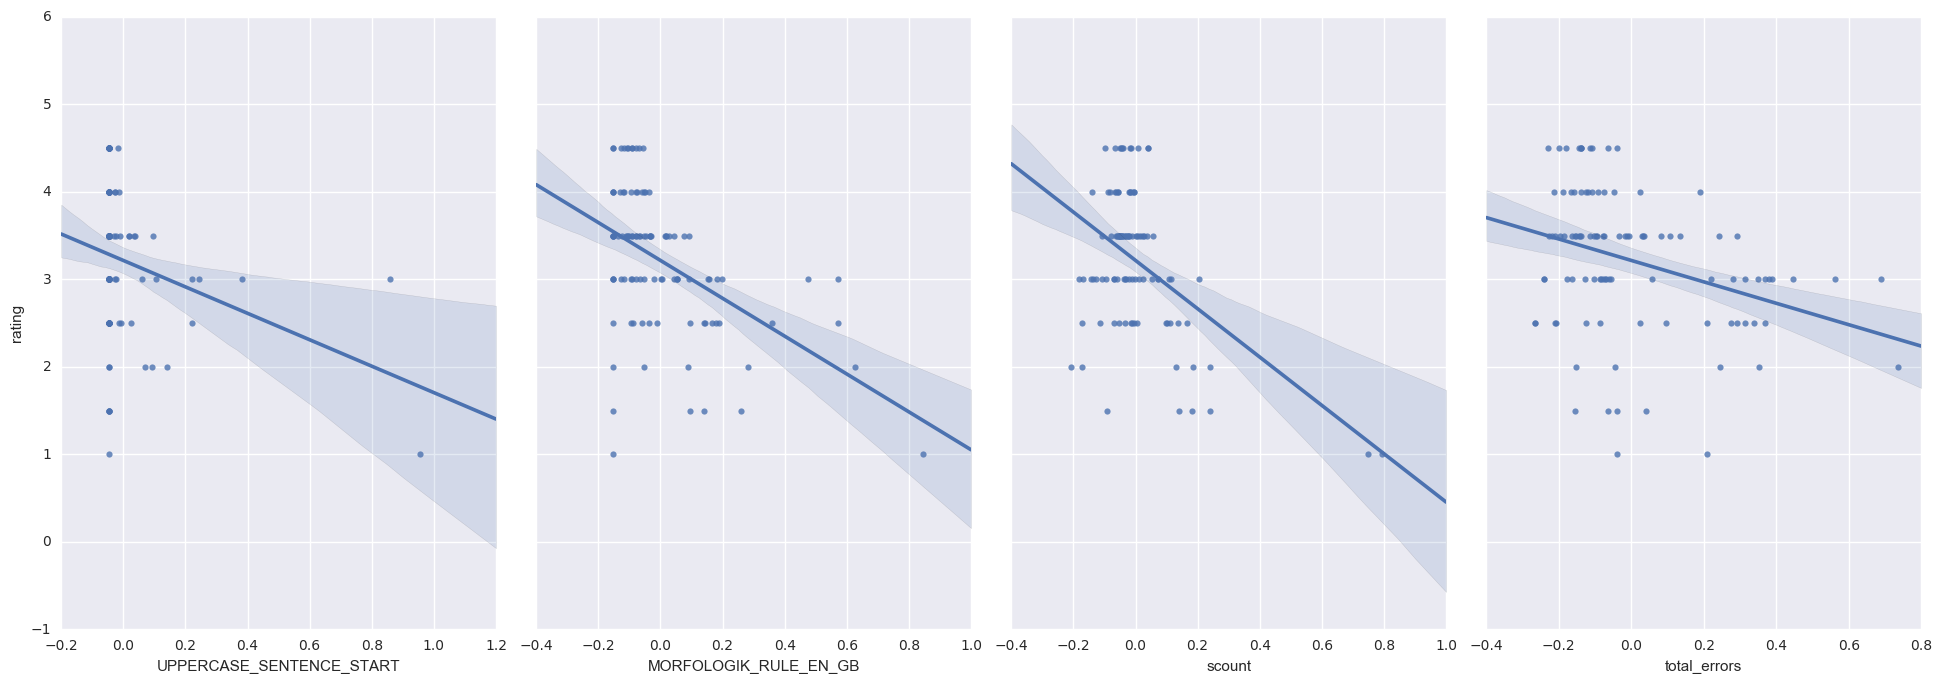

In [10]:
%matplotlib inline

#Let us visualize how each predictor correlates with the target
import seaborn as sns

feature_names = list(df_merged.columns.values)

plt.figure()
sns.pairplot(df_merged, x_vars=['UPPERCASE_SENTENCE_START', 'MORFOLOGIK_RULE_EN_GB', \
                                             'scount', 'total_errors'], y_vars=['rating'], \
             size=7, aspect=0.7, kind='reg')


In [11]:
normalized_data = df_norm.drop(['total_errors'], axis=1)
from sklearn import metrics
def rmse(predictions, targets):
    return np.sqrt(metrics.mean_squared_error(targets, predictions))

In [12]:
#Now we need to split the data into training and test sets, let us use the first
#70 as training set while rest 32 as test set
from sklearn.model_selection import train_test_split
#data= df_merged[['UPPERCASE_SENTENCE_START', 'MORFOLOGIK_RULE_EN_GB', 'COMMA_PARENTHESIS_WHITESPACE', \
#                 'DOUBLE_PUNCTUATION', 'MY_BE', 'EN_A_VS_AN']]
feature_data = df[[ 'total_errors', 'wcount', 'scount']]
#data = df_norm[['total_errors', 'MORFOLOGIK_RULE_EN_GB', 'scount']]
X_train, X_test, y_train, y_test = train_test_split(feature_data, target, test_size=0.3, random_state=0)
#X_train = data[:-32] #Select all but last 32
#X_test = data[-32:] #Select only last 32
#Same with the target variable 'y'
#y_train = target[:-32]
#y_test = target[-32:]

from sklearn import linear_model
regrn = linear_model.LinearRegression() #Initialization of an instance of LinearRegression object

regrn.fit(X_train,y_train) #Train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print (rmse(regrn.predict(X_train), y_train))
#Then on test data
print (rmse(regrn.predict(X_test), y_test))


0.592711001734
0.62190513348


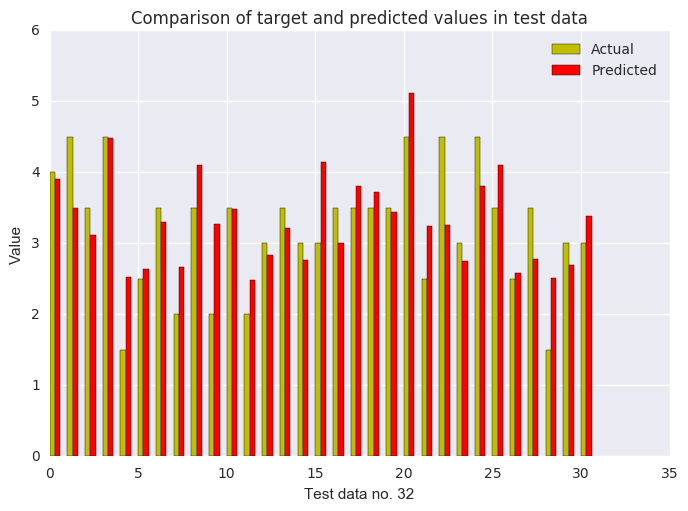

In [14]:
#Let us try to visualize
import matplotlib.pyplot as plt

predicted = regrn.predict(X_test)
ind = np.arange(len(predicted))
width = 0.3
fig, ax = plt.subplots()
rects1 = ax.bar(ind, y_test, width, color='y')
rects2 = ax.bar(ind+width, predicted, width, color='r')
ax.set_title('Comparison of target and predicted values in test data')
ax.set_ylabel('Value')
ax.set_xlabel('Test data no. 32')
ax.legend( (rects1[0], rects2[0]), ('Actual', 'Predicted'), loc='best' )
plt.show()

In [15]:
print regrn.coef_
print regrn.score(X_test, y_test)

[-0.01329984  0.00326655 -0.00243239]
0.45220026346


In [16]:
from sklearn.model_selection import train_test_split
from sklearn import svm
print df_norm.shape
normalized_data = df_norm.drop(['total_errors'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.3, random_state=0)
print X_train.shape
print X_test.shape
svr_rbf = svm.SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = svm.SVR(kernel='linear', C=1)
svr_poly = svm.SVR(kernel='poly', C=1, degree=0.1)
svr_rbf_model = svr_rbf.fit(X_train, y_train)
y_rbf = svr_rbf_model.predict(X_train)
svr_lin_model = svr_lin.fit(X_train, y_train)
y_lin = svr_lin_model.predict(X_train)
svr_poly_model = svr_poly.fit(X_train, y_train)
y_poly = svr_poly_model.predict(X_train)

#svmregr1 = svm.SVR(kernel='linear',C=1).fit(X_train, y_train)
#print svmregr1.score(X_test, y_test)
#regrn.fit(X_train,y_train)
print 'RMSE[linear] training = ' + str(rmse(svr_lin_model.predict(X_train), y_train))
#Then on test data
print 'RMSE[linear] test = ' + str(rmse(svr_lin_model.predict(X_test), y_test))
print 'RMSE[linear] score = ' + str(svr_lin_model.score(X_test, y_test))

print 'RMSE[poly] training = ' + str(rmse(svr_poly_model.predict(X_train), y_train))
#Then on test data
print 'RMSE[poly] test = ' + str(rmse(svr_poly_model.predict(X_test), y_test))
print 'RMSE[poly] score = ' + str(svr_poly_model.score(X_test, y_test))

print 'RMSE[rbf] training = ' + str(rmse(svr_rbf_model.predict(X_train), y_train))
#Then on test data
print 'RMSE[rbf] test = ' + str(rmse(svr_rbf_model.predict(X_test), y_test))
print 'RMSE[rbf] score = ' + str(svr_rbf_model.score(X_test, y_test))

## print the coefficients of linear SVM
#condlist = [abs(svr_lin_model.coef_) > .001]
#choicelist = [svr_lin_model.coef_]
#print np.select(condlist, choicelist)

(102, 76)
(71, 75)
(31, 75)
RMSE[linear] training = 0.375019595518
RMSE[linear] test = 0.779457995536
RMSE[linear] score = 0.139483963302
RMSE[poly] training = 0.806749695025
RMSE[poly] test = 0.861544000337
RMSE[poly] score = -0.0513043478261
RMSE[rbf] training = 0.581484903312
RMSE[rbf] test = 0.761849922155
RMSE[rbf] score = 0.177923202599


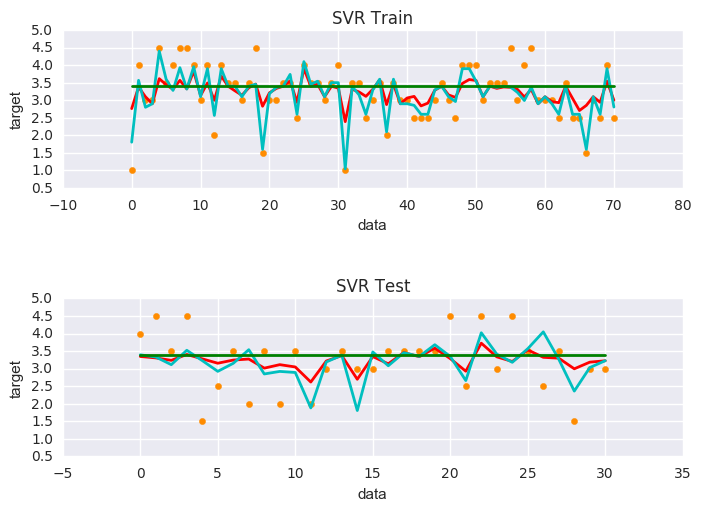

In [17]:
lw = 2
Xr=np.arange(X_train.shape[0])
Xe=np.arange(X_test.shape[0])

y_rbf_test = svr_rbf_model.predict(X_test)
y_lin_test = svr_lin_model.predict(X_test)
y_poly_test = svr_poly_model.predict(X_test)
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharey=True)
axarr[0].scatter(Xr, y=y_train, color='darkorange', label='data')
#plt.hold('on')
axarr[0].plot(Xr, y_rbf, color='r', lw=lw, label='RBF model')
axarr[0].plot(Xr, y_lin, color='c', lw=lw, label='Linear model')
axarr[0].plot(Xr, y_poly, color='g', lw=lw, label='Polynomial model')
axarr[0].set_xlabel('data')
axarr[0].set_ylabel('target')
axarr[0].set_title('SVR Train')

axarr[1].scatter(Xe, y=y_test, color='darkorange', label='data')

axarr[1].plot(Xe, y_rbf_test, color='r', lw=lw, label='RBF model')
axarr[1].plot(Xe, y_lin_test, color='c', lw=lw, label='Linear model')
axarr[1].plot(Xe, y_poly_test, color='g', lw=lw, label='Polynomial model')
#plt.scatter(X, y=y_train, color='darkorange', label='data')
#plt.hold('on')
#plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='g', lw=lw, label='Polynomial model')
axarr[1].set_xlabel('data')
axarr[1].set_ylabel('target')
axarr[1].set_title('SVR Test')
#plt.legend(loc='best')
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

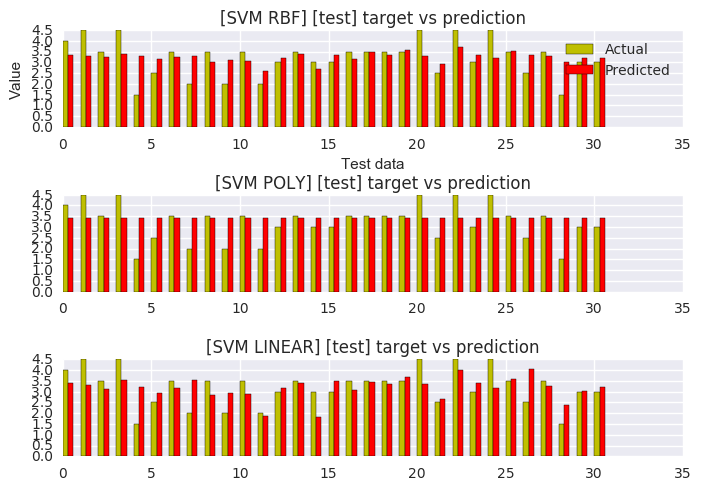

In [18]:
#Plot the regression behaviour on target - 3 methods
ind = np.arange(len(y_test))
width = 0.3
fig, ax = plt.subplots(3, sharey=True)
rects1 = ax[0].bar(ind, y_test, width, color='y')
rects2 = ax[0].bar(ind+width, y_rbf_test, width, color='r')
ax[0].set_title('[SVM RBF] [test] target vs prediction')
ax[0].set_ylabel('Value')
ax[0].set_xlabel('Test data')
ax[0].legend( (rects1[0], rects2[0]), ('Actual', 'Predicted') )
rects1 = ax[1].bar(ind, y_test, width, color='y')
rects2 = ax[1].bar(ind+width, y_poly_test, width, color='r')
ax[1].set_title('[SVM POLY] [test] target vs prediction')
rects1 = ax[2].bar(ind, y_test, width, color='y')
rects2 = ax[2].bar(ind+width, y_lin_test, width, color='r')
ax[2].set_title('[SVM LINEAR] [test] target vs prediction')
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.3, random_state=0)

#Rigde regression or Linear Regression with L2 regularization
from sklearn import linear_model
regRidge = linear_model.Ridge(alpha = .5)
regRidge.fit(X_train, y_train) 
print regRidge.score(X_test, y_test)
print regRidge.coef_
print regRidge.intercept_ 

In [ ]:
#Lasso regression or Linear Regression with L1 regularization
regLasso = linear_model.Lasso(alpha = 0.001)
regLasso.fit(X_train, y_train) 
print regLasso.score(X_test, y_test)
print regLasso.coef_
print regLasso.intercept_

In [ ]:
#SVM Classifier
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_cls, test_size=0.3, random_state=1)
from sklearn.svm import SVC

estimator = SVC(kernel='linear', C=1e4)
estimator.fit(X_train, y_train)
print estimator.score(X_test, y_test)
print estimator.coef_
print estimator.support_vectors_

from sklearn.cross_validation import ShuffleSplit
cv = ShuffleSplit(X_train.shape[0], n_iter =5, test_size=0.2, random_state=0)

from sklearn.grid_search import GridSearchCV
import numpy as np
gammas = np.logspace(-6, -1, 10)
estimator1 = SVC(kernel='linear', C=1e4)
classifier = GridSearchCV(estimator=estimator1, cv=cv, param_grid=dict(gamma=gammas))
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print classifier.score(X_test, y_test)
#print classifier.support_vectors_

In [ ]:
from sklearn.metrics import f1_score
print f1_score(y_test, y_pred, pos_label=1)
print f1_score(y_test, y_pred, pos_label=-1)

from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(normalized_data, target_cls, test_size=0.3, random_state=1)
svmclf = svm.SVC(kernel='linear', C=0.1)
scores = cross_val_score(svmclf, X_train, y_train, cv=5)
print scores
print scores.mean()
svmclf.fit(X_train, y_train)
print svmclf.score(X_test, y_test)
print svmclf.support_

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(normalized_data, target_cls, test_size=0.3, random_state=1)
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)


In [ ]:
y_pred = logit.predict(X_test)
print accuracy_score(y_test, y_pred)

#y_pred = lclf.predict(X_test)

from sklearn.metrics import f1_score
print f1_score(y_test, y_pred, pos_label=1)
print f1_score(y_test, y_pred, pos_label=-1)

In [ ]:
print logit.coef_
print logit.intercept_

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

print df_norm.shape
normalized_data = df_norm.drop(['total_errors'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(normalized_data, target_cls, test_size=0.3, random_state=0)
n_components = 20

print("Extracting the top %d eigenvectors from %d points"
      % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)


print("Projecting the input data on the eigenvectors orthonormal basis")

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


print("Fitting the classifier to the training set")
param_grid = {'C': [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

y_pred = clf.predict(X_test_pca)


print(confusion_matrix(y_test, y_pred, labels=range(2)))

from sklearn.metrics import f1_score
print f1_score(y_test, y_pred, pos_label=1)
print f1_score(y_test, y_pred, pos_label=-1)

from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)
#skf.get_n_splits(X, y)

from sklearn import svm
C_vals = [2, 1, 0.1, 0.01, 0.001]
#svmclf = svm.SVC(kernel='linear', C=0.00001)

from sklearn.metrics import f1_score
#print f1_score(y_test, y_pred, pos_label=1)
#print f1_score(y_test, y_pred, pos_label=-1)

#from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#data= df_merged[['UPPERCASE_SENTENCE_START', 'MORFOLOGIK_RULE_EN_GB', 'COMMA_PARENTHESIS_WHITESPACE', \
#                 'DOUBLE_PUNCTUATION', 'MY_BE', 'EN_A_VS_AN']]
#data = df_merged[['total_errors']]
X_train0, X_test0, y_train0, y_test0 = train_test_split(normalized_data, target_cls, test_size=0.3, random_state=1)
for c in C_vals:
    svmclf = svm.SVC(C = c, kernel='linear')
    scores = cross_val_score(svmclf, X_train, y_train, cv=5, scoring='accuracy')
    f1_score_1 = cross_val_score(svmclf, X_train, y_train, cv=5, scoring='f1')
    print c, scores.mean(), f1_score_1.mean()

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
         min_samples_split=2, random_state=3, max_features=30)

from sklearn.model_selection import train_test_split
normalized_data = df_norm.drop(['total_errors'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(normalized_data, target_cls, test_size=0.3, random_state=1)

scores = cross_val_score(clf, X_train, y_train)
scores.mean()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print accuracy_score(y_test, y_pred)

from sklearn.metrics import f1_score
print f1_score(y_test, y_pred, pos_label=1)
print f1_score(y_test, y_pred, pos_label=-1)

0.838709677419
0.897959183673
0.615384615385
